In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving netflix_cleaned.csv to netflix_cleaned.csv


In [ ]:
# Load the uploaded CSV
df = pd.read_csv("netflix_cleaned.csv")

# Display first 5 rows
df.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.dropna(subset=["director", "country"], inplace=True)


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [ ]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day


In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  year_added    8790 non-null   int32         
 11  month_added   8790 non-null   int32         
 12  day_added     8790 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(1), object(8)
memory usage: 789.9+ KB


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,22
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set plot style
sns.set(style="whitegrid")


<ipython-input-15-7ce98ad3198b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


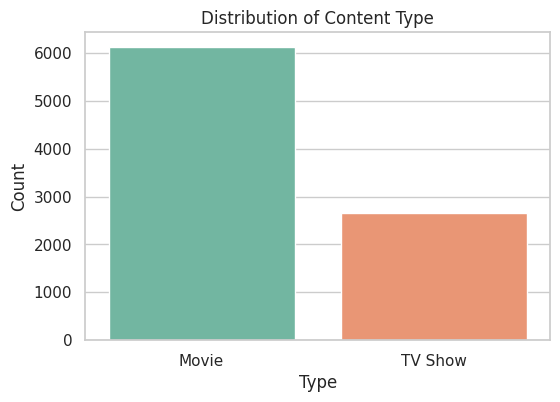

In [ ]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title("Distribution of Content Type")
plt.ylabel("Count")
plt.xlabel("Type")
plt.show()
plt.show()


<ipython-input-16-c260ccfe21e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='coolwarm')


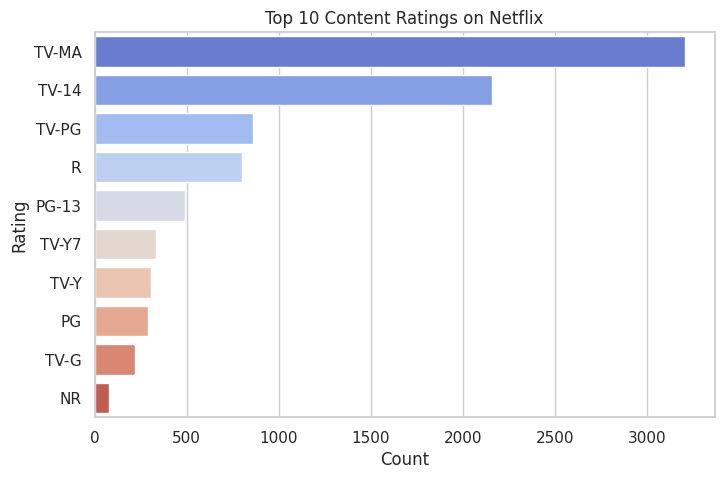

In [ ]:
plt.figure(figsize=(8, 5))
rating_counts = df['rating'].value_counts().head(10)
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='coolwarm')
plt.title("Top 10 Content Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


<ipython-input-17-1e5eec45e316>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


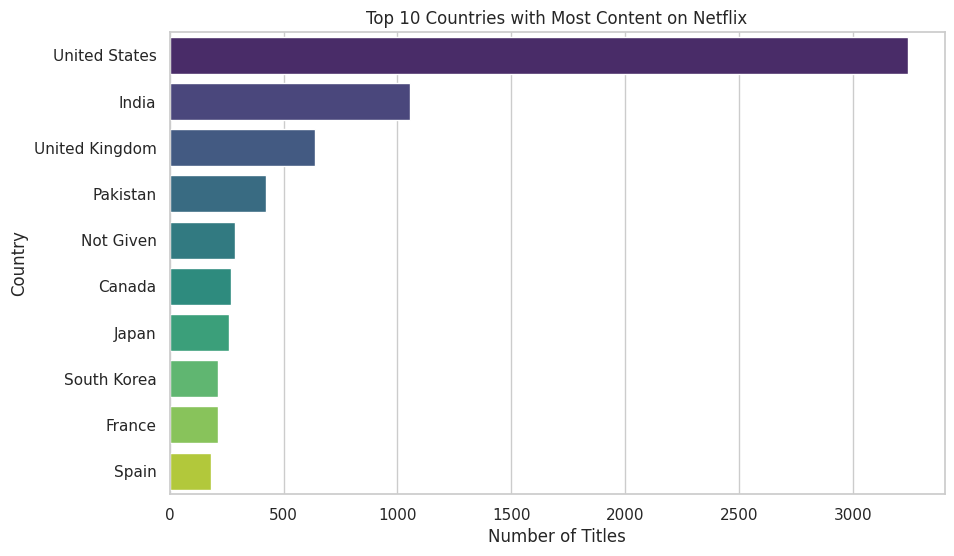

In [ ]:
plt.figure(figsize=(10, 6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries with Most Content on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


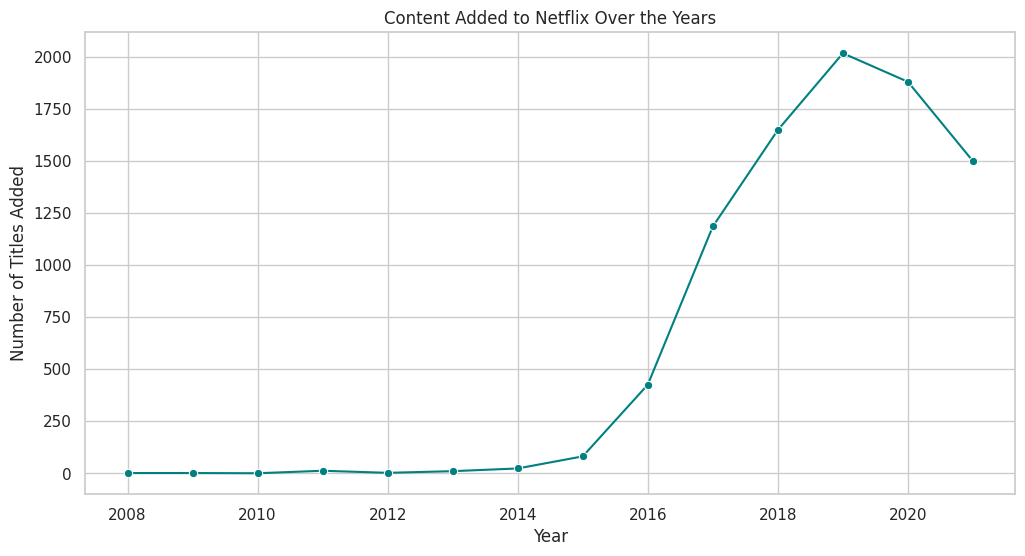

In [ ]:
plt.figure(figsize=(12, 6))
yearly_counts = df['year_added'].value_counts().sort_index()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='teal')
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()


<ipython-input-19-69fa85c65820>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')


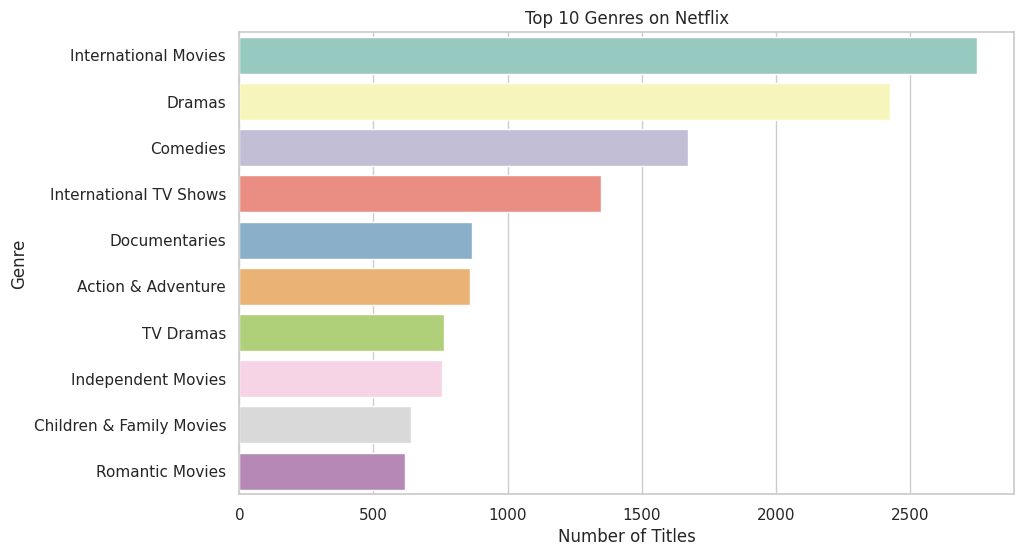

In [ ]:
# Split 'listed_in' into genres list
df['genres'] = df['listed_in'].apply(lambda x: [g.strip() for g in x.split(',')])

# Flatten the list of all genres
all_genres = sum(df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


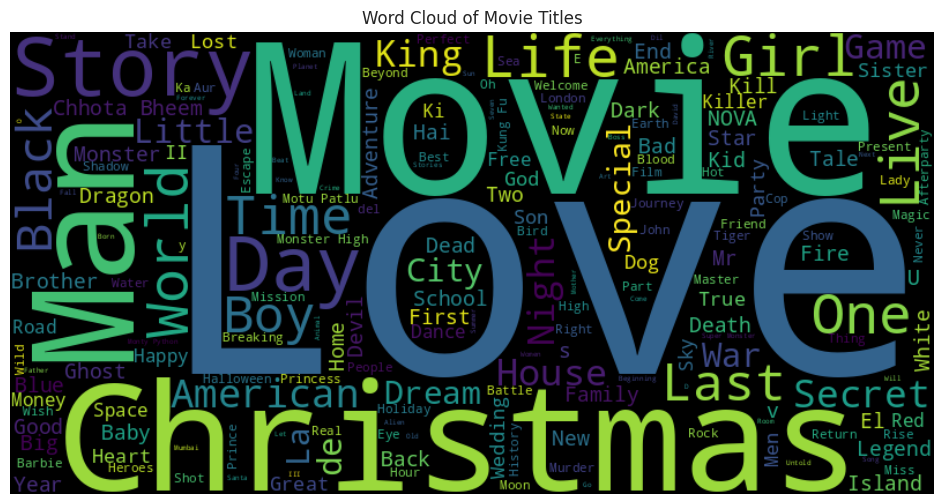

In [ ]:
from wordcloud import WordCloud

movie_titles = df[df['type'] == 'Movie']['title']
text = ' '.join(movie_titles)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Titles")
plt.show()


<ipython-input-22-c1f9275f6d85>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


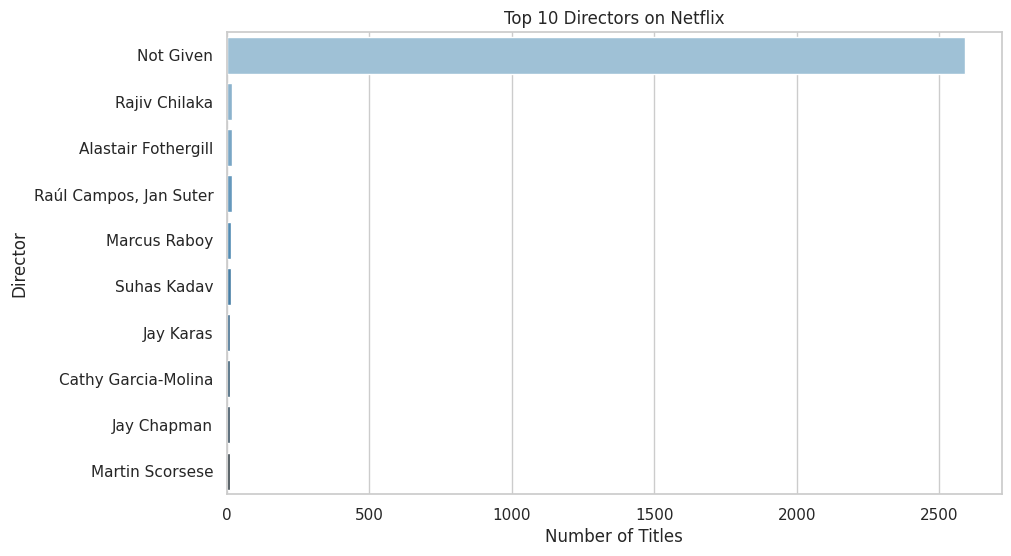

In [ ]:
top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


In [ ]:
# Export final cleaned dataset (including genre split)
df.to_csv("netflix_cleaned.csv", index=False)


In [ ]:
from google.colab import files
files.download("netflix_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>